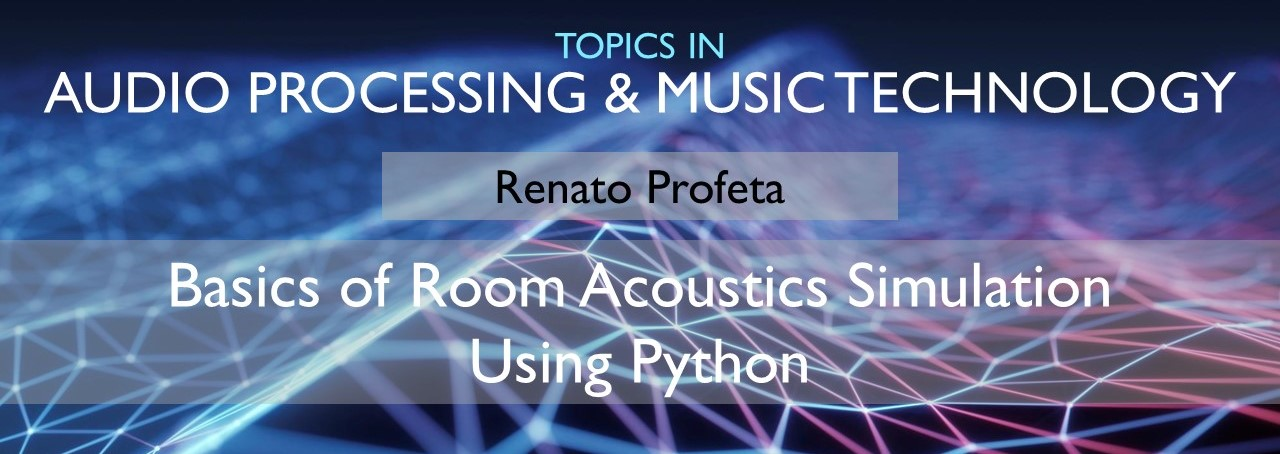

Youtube Playlist: [![Youtube](https://badgen.net/badge/Launch/on%20YouTube/red?icon=terminal)](https://youtube.com/playlist?list=PL6QnpHKwdPYgxLV_Ijr6K_3Gdyfhk0SHg)


In [15]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/videoseries?list=PL6QnpHKwdPYgxLV_Ijr6K_3Gdyfhk0SHg" title="YouTube video player" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# Importing STL Files in PyRoomAcoustics
<html>
<cite> Based on https://github.com/LCAV/pyroomacoustics/blob/master/examples/room_from_stl.py </cite>
</html>

In [16]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ILZbZnhqCdw" title="YouTube video player" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Configuration

In [1]:
# Install PyRoomAcoustics
!pip install pyroomacoustics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Install Numpy-STL
!pip install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Install ipympl
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Download STL File from PyRoomAcoustics GitHub
!wget https://raw.githubusercontent.com/LCAV/pyroomacoustics/master/examples/data/INRIA_MUSIS.stl

--2023-05-28 10:19:12--  https://raw.githubusercontent.com/LCAV/pyroomacoustics/master/examples/data/INRIA_MUSIS.stl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1284 (1.3K) [application/octet-stream]
Saving to: ‘INRIA_MUSIS.stl.1’

INRIA_MUSIS.stl.1   100%[===================>]   1.25K  --.-KB/s    in 0s      

2023-05-28 10:19:12 (48.0 MB/s) - ‘INRIA_MUSIS.stl.1’ saved [1284/1284]



In [5]:
# Configure Colab to use ipympl
from google.colab import output
output.enable_custom_widget_manager()

In [6]:
# Activate ipympl backend
%matplotlib ipympl

## Imports

In [7]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

import pyroomacoustics as pra

try:
    from stl import mesh
except ImportError as err:
    print(
        "The numpy-stl package is required for this example. "
        "Install it with `pip install numpy-stl`"
    )
    raise err

stl_path = Path("INRIA_MUSIS.stl")

## Load the STL File

In [8]:
the_mesh = mesh.Mesh.from_file(stl_path)

In [9]:
ntriang, nvec, npts = the_mesh.vectors.shape
size_reduc_factor = 500.0  # to get a realistic room size (not 3km)

## Define Materials

In [10]:
material = pra.Material(energy_absorption=0.2, scattering=0.1)

## Create Walls from Triangles

In [11]:
 # create one wall per triangle
walls = []
for w in range(ntriang):
    walls.append(
        pra.wall_factory(
            the_mesh.vectors[w].T / size_reduc_factor,
            material.energy_absorption["coeffs"],
            material.scattering["coeffs"],
        )
    )


## Define a Room with Source and Microphone


In [12]:
room = (
        pra.Room(
            walls,
            fs=16000,
            max_order=3,
            ray_tracing=True,
            air_absorption=True,
        )
        .add_source([-2.0, 2.0, 1.8])
        .add_microphone_array(np.c_[[-6.5, 8.5, 3 + 0.1], [-6.5, 8.1, 3 + 0.1]])
    )


## Compute the RIR

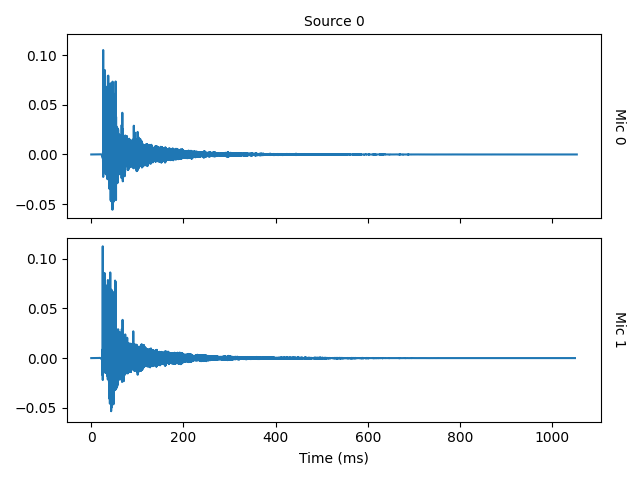

In [13]:
# compute the rir
room.image_source_model()
room.ray_tracing()
room.compute_rir()
room.plot_rir();

## Plot the Room

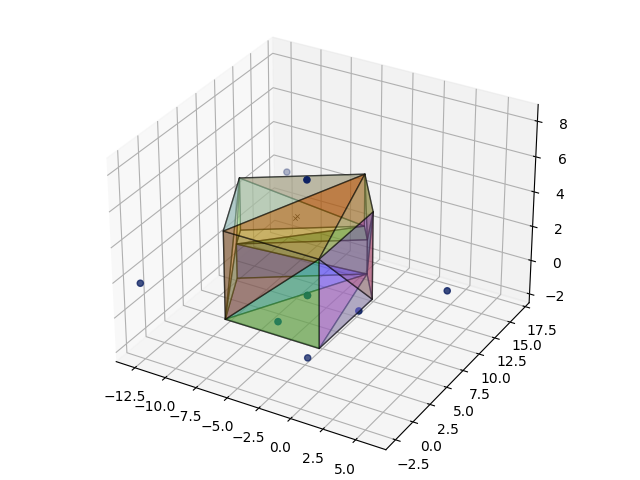

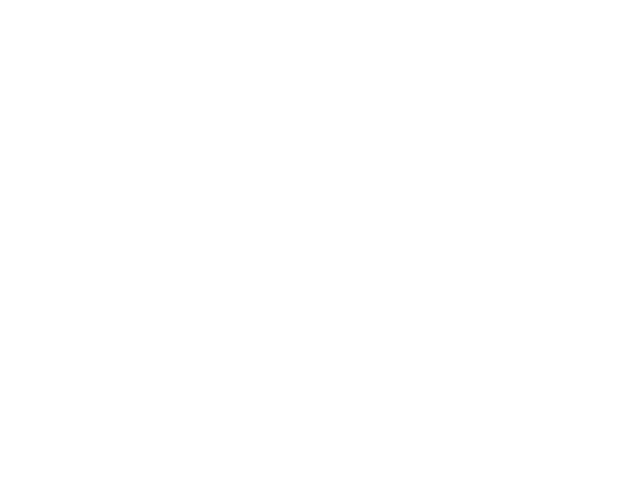

In [14]:
plt.figure()
room.plot(img_order=1)
plt.show()